[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Patryk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Patryk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


--- Podobieństwo semantyczne (Word2Vec) ---
Podobieństwo między 'acting' a 'movie': -0.0008

--- Wykryte tematy (LDA) ---
Temat 0: 0.075*"the" + 0.055*"," + 0.054*"was" + 0.054*"." + 0.033*"of" + 0.033*"but" + 0.032*"visual" + 0.032*"plot" + 0.032*"stunning" + 0.032*"weak"
Temat 1: 0.088*"the" + 0.076*"." + 0.053*"a" + 0.041*"and" + 0.041*"acting" + 0.041*"was" + 0.029*"with" + 0.029*"movie" + 0.029*"masterpiece" + 0.029*"plot"




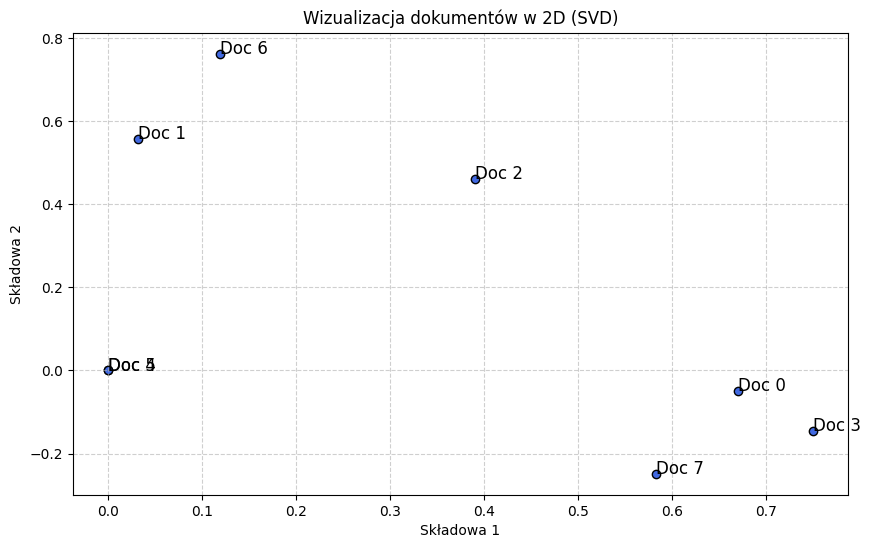

In [5]:
import nltk
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, LdaModel
from gensim.corpora import Dictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import word_tokenize

# Pobieranie niezbędnych zasobów
nltk.download("punkt")
nltk.download("punkt_tab")

# Załadowanie recenzji
corpus = [
    "The acting was brilliant and the plot was gripping.",
    "A masterpiece of modern cinema, truly inspiring.",
    "The plot was weak, but the visual effects were stunning.",
    "A boring movie with terrible acting and a slow plot.",
    "I loved the soundtrack and the cinematography was top notch.",
    "An absolute waste of time, the script was garbage.",
    "The director created a visual masterpiece with great characters.",
    "Predictable story, but the acting saved the whole movie.",
]

# Tokenizacja
tokenized_corpus = [word_tokenize(doc.lower()) for doc in corpus]

# Wektoryzacja (TF-IDF dla celów SVD)
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(corpus)

# Word2Vec - Podobieństwo semantyczne
w2v_model = Word2Vec(
    sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4
)

print("--- Podobieństwo semantyczne (Word2Vec) ---")
word1, word2 = "acting", "movie"
similarity = w2v_model.wv.similarity(word1, word2)
print(f"Podobieństwo między '{word1}' a '{word2}': {similarity:.4f}\n")

# Analiza tematów (LDA)
# Tworzenie słownika i korpusu Bag-of-Words dla Gensim
dictionary = Dictionary(tokenized_corpus)
gensim_corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]

lda_model = LdaModel(gensim_corpus, num_topics=2, id2word=dictionary, passes=15)

print("--- Wykryte tematy (LDA) ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Temat {idx}: {topic}")
print("\n")

# Redukcja wymiarowości (SVD) do 2D i Wizualizacja
svd = TruncatedSVD(n_components=2)
coords = svd.fit_transform(tfidf_matrix)

plt.figure(figsize=(10, 6))
plt.scatter(coords[:, 0], coords[:, 1], c="royalblue", edgecolors="k")

for i, txt in enumerate(corpus):
    plt.annotate(f"Doc {i}", (coords[i, 0], coords[i, 1]), size=12)

plt.title("Wizualizacja dokumentów w 2D (SVD)")
plt.xlabel("Składowa 1")
plt.ylabel("Składowa 2")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
